In [10]:
import numpy as np
import pandas as pd
import nltk
import string
import random
import copy
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 2)

In [2]:
df = pd.read_csv('preprocessed.csv', low_memory=False)
df['Date'] = df['Date'].astype('datetime64[ns]')
df['SalaryRange'] = (df['HighestSalary']-df['LowestSalary'])
df['AverageSalary'] = (df['HighestSalary']+df['LowestSalary'])/2

In [3]:
df.describe()

,Id,LowestSalary,HighestSalary,SalaryRange,AverageSalary
count,9.952000e+03,9952.000000,9952.000000,9952.000000,9952.000000
mean,3.779744e+07,65.574759,115.072347,49.497588,90.323553
std,2.934618e+05,50.966453,180.476991,147.766937,110.118095
min,3.684559e+07,0.000000,30.000000,10.000000,15.000000
25%,3.751094e+07,30.000000,40.000000,10.000000,35.000000
50%,3.788894e+07,60.000000,70.000000,20.000000,65.000000
75%,3.801222e+07,100.000000,120.000000,30.000000,110.000000
max,3.856223e+07,200.000000,999.000000,799.000000,599.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     9952 non-null   int64         
 1   Title                  9952 non-null   object        
 2   Company                9952 non-null   object        
 3   Date                   9952 non-null   datetime64[ns]
 4   Location               9952 non-null   object        
 5   Area                   9952 non-null   object        
 6   Classification         9952 non-null   object        
 7   SubClassification      9952 non-null   object        
 8   Requirement            9952 non-null   object        
 9   FullDescription        9952 non-null   object        
 10  LowestSalary           9952 non-null   int64         
 11  HighestSalary          9952 non-null   int64         
 12  JobType                9952 non-null   object        
 13  Ful

In [5]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,FullDescriptionTokens,RequirementTokens,TitleTokens,SalaryRange,AverageSalary
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,Our client is based in Yarraville&nbsp;and is ...,50,60,Contract/Temp,"['Our', 'client', 'based', 'Yarravillenbspand'...","['Our', 'client', 'looking', 'experienced', 'c...","['Our', 'client', 'looking', 'experienced', 'c...",10,55.0
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,DiUS is an Australian technology consultancy. ...,120,150,Full Time,"['DiUS', 'Australian', 'technology', 'consulta...","['If', 'love', 'thing', 'Agile', 'experience',...","['If', 'love', 'thing', 'Agile', 'experience',...",30,135.0
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,About the&nbsp;Organisation Life Without Barri...,100,120,Full Time,"['About', 'thenbspOrganisation', 'Life', 'With...","['Join', 'Lower', 'Hunter', 'team', 'Local', '...","['Join', 'Lower', 'Hunter', 'team', 'Local', '...",20,110.0
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,Correct Care Australasia (Correct Care)...,0,30,Part Time,"['Correct', 'Care', 'Australasia', 'Correct', ...","['This', 'exciting', 'opportunity', 'Clinical'...","['This', 'exciting', 'opportunity', 'Clinical'...",30,15.0
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,The Company Elastomers Australia is an industr...,50,60,Full Time,"['The', 'Company', 'Elastomers', 'Australia', ...","['Elastomers', 'Australia', 'currently', 'seek...","['Elastomers', 'Australia', 'currently', 'seek...",10,55.0
5,38063057,Receptionist,Gough Property & Real Estate Recruiters,2019-01-09,Other,Other,Other,Other,** Entry Level Real Estate Reception roles SYD...,Do you want a break into real estate?&nbsp; ...,40,50,Full Time,"['Do', 'want', 'break', 'real', 'estatenbsp', ...","['Entry', 'Level', 'Real', 'Estate', 'Receptio...","['Entry', 'Level', 'Real', 'Estate', 'Receptio...",10,45.0
6,38079997,Principal Engineer Operations Planning,Powerlink,2019-01-10,Other,Other,Other,Other,Critical expert role to keep Queensland's HV t...,"Powerlink, and its predecessor companies have ...",150,200,Contract/Temp,"['Powerlink', 'predecessor', 'company', 'helpi...","['Critical', 'expert', 'role', 'keep', 'Queens...","['Critical', 'expert', 'role', 'keep', 'Queens...",50,175.0
7,38068325,Forklift Operator with Admin Experience,Toll,2019-01-10,Other,Other,Other,Other,Immediate start / Morning shift available / Ex...,About the company Toll People in conju...,30,40,Full Time,"['About', 'company', 'Toll', 'People', 'conjun...","['Immediate', 'start', 'Morning', 'shift', 'av...","['Immediate', 'start', 'Morning', 'shift', 'av...",10,35.0
8,37409088,Retail Goods Receiving / Warehouse - Springwood,Total Tools - Store Network,2018-10-08,Brisbane,Southern Suburbs & Logan,Retail & Consumer Products,Other,Utilise your goods receiving experience and wa...,About the Role Total Tools Springwood is...,40,50,Full Time,"['About', 'Role', 'Total', 'Tools', 'Springwoo...","['Utilise', 'good', 'receiving', 'experience',...","['Utilise', 'good', 'receiving', 'experience',...",10,45.0
9,37449308,Commercial Manager - Oil & Gas - PNG based,Amida,2018-10-12,Brisbane,Other,"Mining, Re

In [6]:
df = df.loc[df['Classification'] == 'Information & Communication Technology']

In [7]:
#df = df.loc[df['SubClassification'] == 'Programme & Project Management']

In [8]:
BOW = dict()
TitleBOW = dict()
RequirementBOW = dict()
DescriptionBOW = dict()
for y in df['FullDescriptionTokens']:
    y = eval(y)
    for x in y:
        x = x.lower()
        if x in DescriptionBOW:
            DescriptionBOW[x] +=1
            BOW[x] +=1
        else:
            if x in BOW:
                BOW[x] += 1
            else:
                BOW[x] = 1
            DescriptionBOW[x] = 1
for y in df['RequirementTokens']:
    y = eval(y)
    for x in y:
        x = x.lower()
        if x in RequirementBOW:
            RequirementBOW[x] +=1
            BOW[x] +=1
        else:
            if x in BOW:
                BOW[x] += 1
            else:
                BOW[x] = 1
            RequirementBOW[x] = 1
for y in df['TitleTokens']:
    y = eval(y)
    for x in y:
        x = x.lower()
        if x in TitleBOW:
            TitleBOW[x] +=1
            BOW[x] +=1
        else:
            if x in BOW:
                BOW[x] += 1
            else:
                BOW[x] = 1
            TitleBOW[x] = 1

In [9]:
print(TitleBOW)

{'great': 28, 'opportunity': 131, 'passionate': 9, 'computer': 5, 'science': 2, 'graduate': 10, 'join': 130, 'leading': 57, 'professional': 12, 'services': 29, 'company': 54, 'sydney': 48, 'currently': 15, 'seeking': 70, 'experienced': 94, 'transformation': 20, 'change': 29, 'manager': 69, 'major': 13, 'project': 126, 'revolutionise': 1, 'client': 72, 'contact': 1, 'centre': 4, 'senior': 66, 'office': 17, '365': 10, 'cbd': 75, 'location': 27, 'customer': 23, 'focused': 14, 'facing': 5, 'autonomous': 1, 'solution': 55, 'specialist': 17, 'team': 124, 'head': 4, 'located': 6, 'macquarie': 8, 'park': 7, 'user': 9, 'researcher': 1, 'help': 22, 'department': 20, 'transform': 2, 'digital': 39, 'government': 49, 'service': 52, 'contribute': 3, 'proactive': 2, 'management': 39, 'security': 35, 'threat': 1, 'risk': 4, 'unisas': 1, 'network': 29, 'data': 51, 'working': 38, 'global': 44, 'organisation': 53, 'developing': 9, 'across': 22, 'cutting': 7, 'edge': 7, 'technology': 52, 'complex': 12, 'w

In [10]:
print(RequirementBOW['computer'],RequirementBOW['science'])

5 2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 20 to 9938
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     724 non-null    int64         
 1   Title                  724 non-null    object        
 2   Company                724 non-null    object        
 3   Date                   724 non-null    datetime64[ns]
 4   Location               724 non-null    object        
 5   Area                   724 non-null    object        
 6   Classification         724 non-null    object        
 7   SubClassification      724 non-null    object        
 8   Requirement            724 non-null    object        
 9   FullDescription        724 non-null    object        
 10  LowestSalary           724 non-null    int64         
 11  HighestSalary          724 non-null    int64         
 12  JobType                724 non-null    object        
 13  Ful

In [12]:
def sorter(e):
    return e[1]

TitleFreq = []
for x in TitleBOW:
    TitleFreq.append((x,TitleBOW[x]))
TitleFreq.sort(key=sorter,reverse=True)
RequirementFreq = []
for x in RequirementBOW:
    RequirementFreq.append((x,RequirementBOW[x]))
RequirementFreq.sort(key=sorter,reverse=True)
DescriptionFreq = []
for x in DescriptionBOW:
    DescriptionFreq.append((x,DescriptionBOW[x]))
DescriptionFreq.sort(key=sorter,reverse=True)

In [13]:
print(TitleFreq[:50])
print()
print(RequirementFreq[:50])
print()
print(DescriptionFreq[:50])

[('opportunity', 131), ('join', 130), ('contract', 130), ('project', 126), ('team', 124), ('looking', 103), ('role', 98), ('business', 97), ('experienced', 94), ('month', 87), ('work', 80), ('cbd', 75), ('based', 73), ('experience', 73), ('client', 72), ('developer', 71), ('seeking', 70), ('manager', 69), ('senior', 66), ('analyst', 65), ('leading', 57), ('it', 57), ('support', 57), ('solution', 55), ('company', 54), ('6', 54), ('organisation', 53), ('we', 53), ('service', 52), ('technology', 52), ('data', 51), ('engineer', 50), ('government', 49), ('sydney', 48), ('exciting', 48), ('large', 47), ('global', 44), ('new', 44), ('technical', 41), ('digital', 39), ('management', 39), ('lead', 39), ('working', 38), ('melbourne', 38), ('security', 35), ('a', 35), ('architect', 34), ('within', 32), ('required', 32), ('financial', 31)]

[('opportunity', 131), ('join', 130), ('contract', 130), ('project', 126), ('team', 124), ('looking', 103), ('role', 98), ('business', 97), ('experienced', 94)

In [14]:
df['FullDescription'][9938]

"Bluefin Resources are working with a prestigious government enterprise to recruit a Front End Developer.       Brief role description: You are the synthesis of design and development. You will take innovative product concepts and bring them to life in an effort to push the boundaries of user interface design. You will be appreciated         with your design aesthetic and technical know-how. You'll need both types of skills to develop the next generation of products. You'll partner with Developers and Designers to define and deliver new features, test new concepts and assist with         final implementation. Details are critical as you iterate on complex interactions, animations and pixel-perfect visual designs. You will work closely with stakeholders to translate concepts into living, breathing prototypes, as well as production         level code and assist engineering with the final implementation.   Responsibilities                Execute design with the use of but not limited to C

In [15]:
keywords = ['java','python','javascript','js','node','angular','react','jquery','sql','engineer',
            'c++','c#','assembly','fortran','cloud','jira','confluence','selenium','git','github',
            'written','verbal','communication','manager','leadership','collaboration','customer',
            'stakeholder','user','security','clearance','consulting','health','healthcare',
            'research','ui','gui','design','front','back','ai','neural']
keywords_freq = []
for x in keywords:
    x = x.lower()
    print(x,end=' ')
    try:
        print(TitleBOW[x],end=' ')
    except:
        print(0,end=' ')
    try:
        print(RequirementBOW[x],end=' ')
    except:
        print(0,end=' ')
    try:
        print(DescriptionBOW[x])
        keywords_freq.append(DescriptionBOW[x])
    except:
        print(0)
        keywords_freq.append(0)

java 20 20 102
python 5 5 39
javascript 4 4 81
js 1 1 13
node 2 2 7
angular 4 4 47
react 5 5 38
jquery 0 0 20
sql 9 9 122
engineer 50 50 148
c++ 0 0 0
c# 0 0 0
assembly 1 1 0
fortran 0 0 0
cloud 22 22 216
jira 1 1 26
confluence 0 0 11
selenium 0 0 8
git 2 2 35
github 0 0 11
written 2 2 133
verbal 1 1 92
communication 6 6 378
manager 69 69 254
leadership 9 9 107
collaboration 1 1 47
customer 23 23 526
stakeholder 4 4 438
user 9 9 245
security 35 35 410
clearance 5 5 48
consulting 14 14 111
health 7 7 101
healthcare 2 2 21
research 0 0 50
ui 3 3 31
gui 0 0 2
design 21 21 556
front 13 13 52
back 3 3 22
ai 0 0 7
neural 0 0 1


In [16]:
keys = list(DescriptionBOW.keys())

In [17]:
#keyframe = pd.DataFrame({'words':keys[:50],'freq':keywords_freq[:50]})
keyframe = pd.DataFrame({'words':keywords,'freq':keywords_freq})
keyframe.sort_values('freq',inplace=True,ascending=False)
keyframe.head()

,words,freq
37,design,556
26,customer,526
27,stakeholder,438
29,security,410
22,communication,378


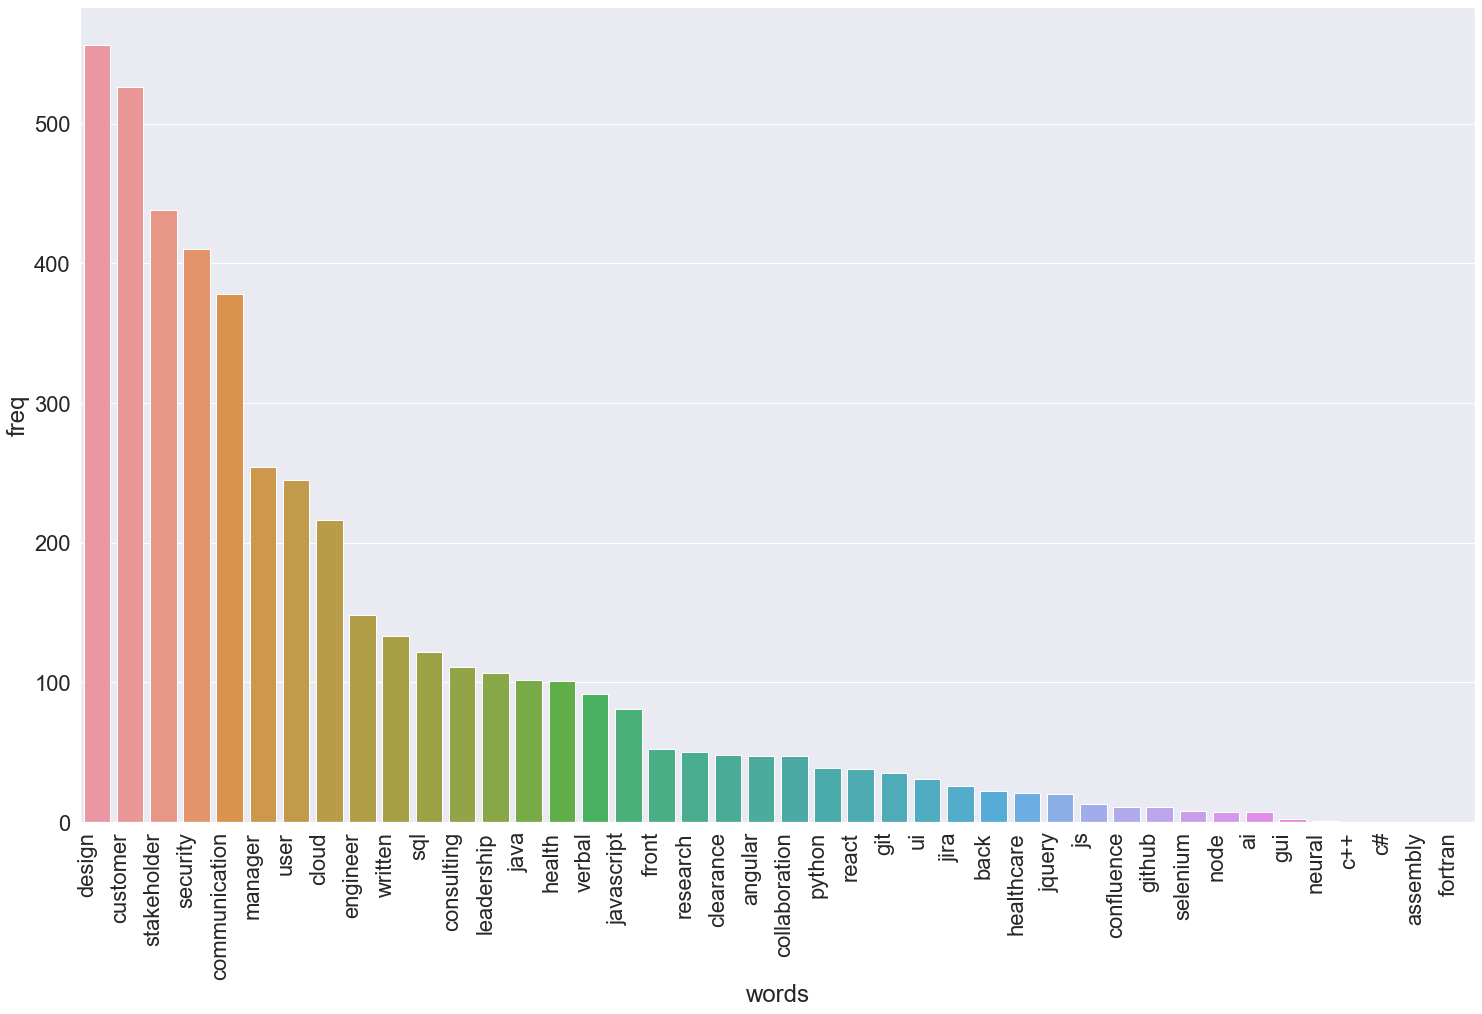

In [18]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=keyframe.words, y=keyframe.freq)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [19]:
subclassframe = df['SubClassification']
subclassframe = subclassframe.value_counts()
subclassframe = pd.DataFrame({'subclass':subclassframe.index,'freq':subclassframe})
subclassframe.reset_index(drop=True,inplace=True)
subclassframe

,subclass,freq
0,Developers/Programmers,138
1,Business/Systems Analysts,86
2,Programme & Project Management,78
3,Architects,57
4,Help Desk & IT Support,49
5,Engineering - Software,45
6,Networks & Systems Administration,37
7,Other,32
8,Consultants,32
9,Security,27


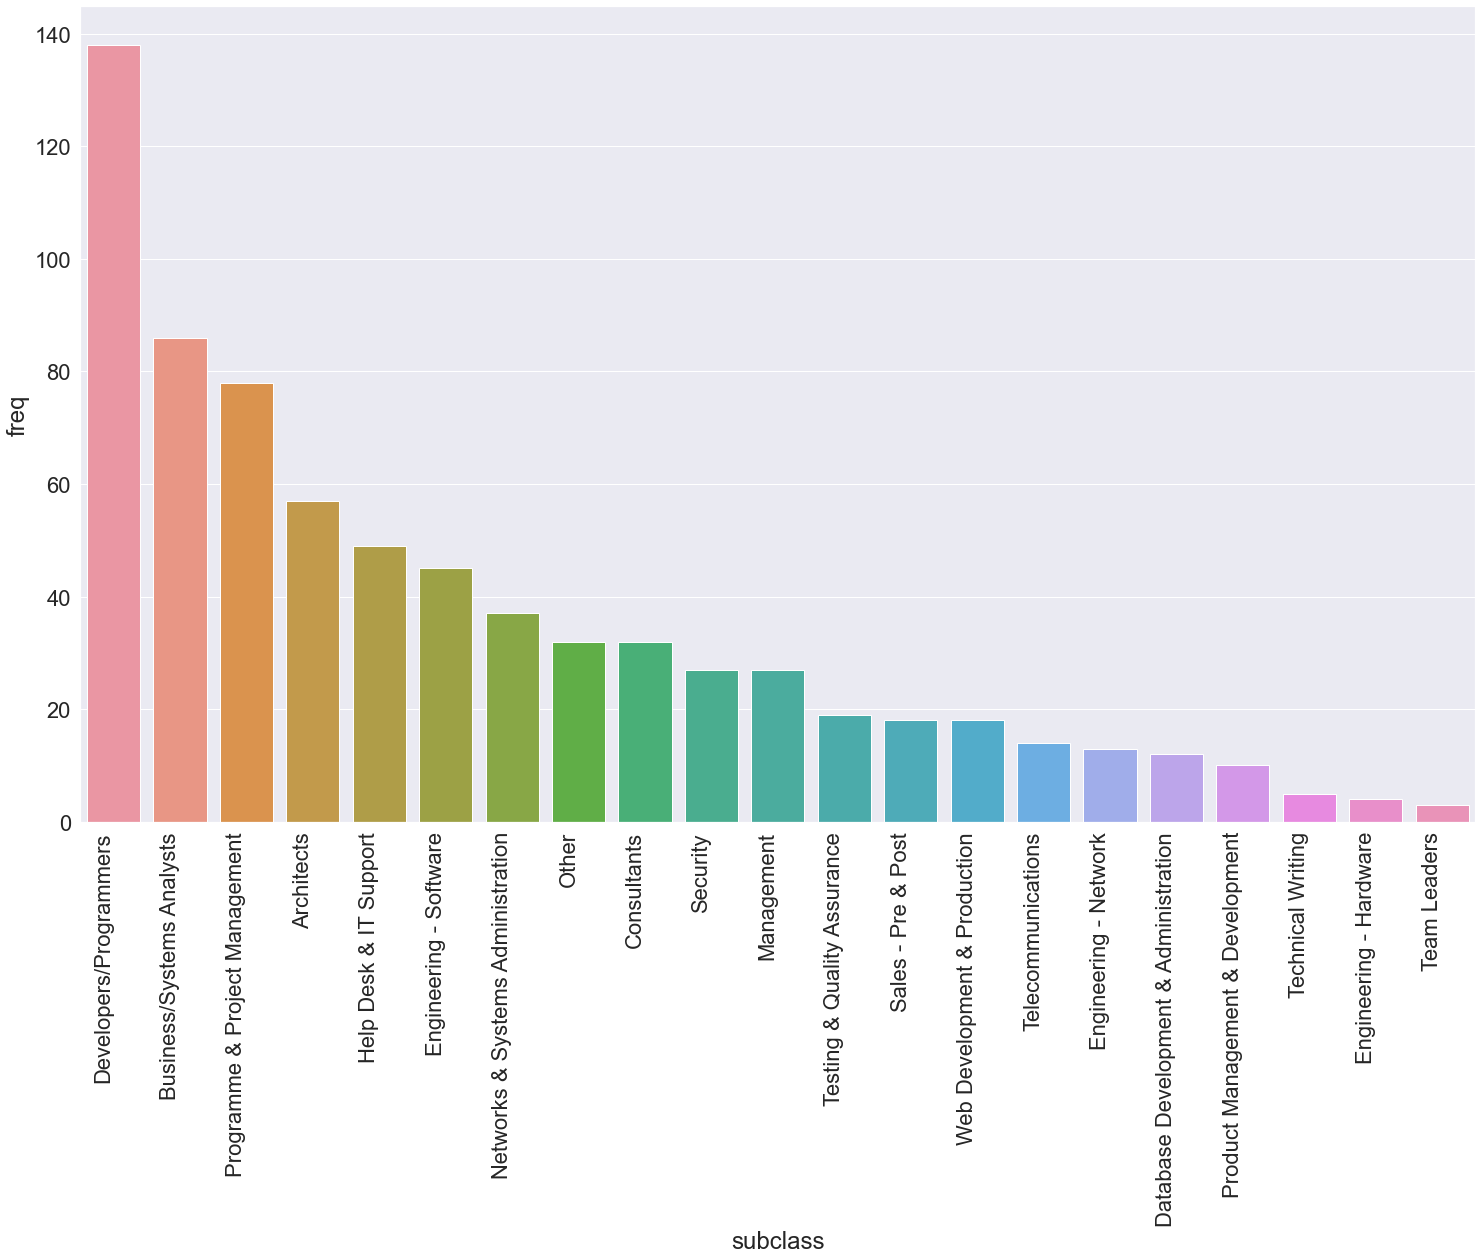

In [20]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=subclassframe.subclass,y=subclassframe.freq)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [21]:
df.loc[df['SubClassification'] == 'Architects'].head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,FullDescriptionTokens,RequirementTokens,TitleTokens,SalaryRange,AverageSalary
157,37600977,Datacentre Engineer (Full Time Permanent),Launch Recruitment Pty Ltd,2018-10-31,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Architects,Datacentre Engineer opportunity with reputed g...,The CompanyReputed international technology in...,120,150,Full Time,"['The', 'CompanyReputed', 'international', 'te...","['Datacentre', 'Engineer', 'opportunity', 'rep...","['Datacentre', 'Engineer', 'opportunity', 'rep...",30,135.0
170,37736971,O365 & Cloud Architect,Veritec,2018-12-13,ACT,Other,Information & Communication Technology,Architects,Use your Office 365 and Microsoft Azure knowle...,About the Role&nbsp; We have a Senior Of...,120,150,Full Time,"['About', 'Rolenbsp', 'We', 'Senior', 'Office'...","['Use', 'Office', '365', 'Microsoft', 'Azure',...","['Use', 'Office', '365', 'Microsoft', 'Azure',...",30,135.0
358,37570096,Solutions Architect,Hudson,2018-10-26,ACT,Other,Information & Communication Technology,Architects,We are seeking a Solutions Architect for one o...,We are seeking a Solutions Architect for one o...,200,999,Contract/Temp,"['We', 'seeking', 'Solutions', 'Architect', 'o...","['We', 'seeking', 'Solutions', 'Architect', 'o...","['We', 'seeking', 'Solutions', 'Architect', 'o...",799,599.5
379,37504950,Solution Architect,Harrison McMillan,2018-10-18,Adelaide,Other,Information & Communication Technology,Architects,Seeking a professional and experienced Solutio...,Seeking a professional and experienced Solutio...,100,120,Full Time,"['Seeking', 'professional', 'experienced', 'So...","['Seeking', 'professional', 'experienced', 'So...","['Seeking', 'professional', 'experienced', 'So...",20,110.0
676,37433374,Senior Security Solutions Architect,Peoplebank Australia NSW,2018-10-10,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Architects,Work on a small team within a large organisati...,12 month contract Wor...,120,150,Contract/Temp,"['12', 'month', 'contract', 'Work', '2', 'day'...","['Work', 'small', 'team', 'within', 'large', '...","['Work', 'small', 'team', 'within', 'large', '...",30,135.0


In [22]:
df.loc[df['SubClassification'] == 'Developers/Programmers'].describe()

,Id,LowestSalary,HighestSalary,SalaryRange,AverageSalary
count,1.380000e+02,138.000000,138.000000,138.000000,138.000000
mean,3.761182e+07,108.260870,261.869565,153.608696,185.065217
std,1.924983e+05,64.195334,327.027975,282.297985,188.709117
min,3.736741e+07,0.000000,30.000000,10.000000,15.000000
25%,3.745776e+07,80.000000,100.000000,20.000000,90.000000
50%,3.757555e+07,120.000000,150.000000,30.000000,135.000000
75%,3.770959e+07,150.000000,200.000000,50.000000,175.000000
max,3.793661e+07,200.000000,999.000000,799.000000,599.500000


In [23]:
df.loc[df['SubClassification'] == 'Business/Systems Analysts'].describe()

,Id,LowestSalary,HighestSalary,SalaryRange,AverageSalary
count,8.600000e+01,86.000000,86.000000,86.000000,86.000000
mean,3.767414e+07,124.418605,326.872093,202.453488,225.645349
std,2.095609e+05,60.363695,363.829592,319.749926,206.028808
min,3.735815e+07,0.000000,30.000000,10.000000,15.000000
25%,3.750111e+07,100.000000,120.000000,30.000000,110.000000
50%,3.763054e+07,120.000000,150.000000,30.000000,135.000000
75%,3.791131e+07,150.000000,200.000000,50.000000,175.000000
max,3.793789e+07,200.000000,999.000000,799.000000,599.500000


In [24]:
df.loc[df['SubClassification'] == 'Programme & Project Management'].describe()

,Id,LowestSalary,HighestSalary,SalaryRange,AverageSalary
count,7.800000e+01,78.000000,78.000000,78.000000,78.000000
mean,3.761073e+07,126.794872,407.756410,280.961538,267.275641
std,1.878184e+05,73.050304,412.943699,358.216232,236.325423
min,3.736764e+07,0.000000,30.000000,20.000000,15.000000
25%,3.745035e+07,100.000000,120.000000,30.000000,110.000000
50%,3.757598e+07,150.000000,200.000000,50.000000,175.000000
75%,3.770790e+07,200.000000,999.000000,799.000000,599.500000
max,3.793731e+07,200.000000,999.000000,799.000000,599.500000


In [25]:
df.loc[df['SubClassification'] == 'Architects'].describe()

,Id,LowestSalary,HighestSalary,SalaryRange,AverageSalary
count,5.700000e+01,57.000000,57.000000,57.000000,57.000000
mean,3.761282e+07,144.561404,437.385965,292.824561,290.973684
std,1.887063e+05,57.850490,403.707141,361.237561,224.810861
min,3.736532e+07,0.000000,30.000000,10.000000,15.000000
25%,3.744947e+07,120.000000,150.000000,30.000000,135.000000
50%,3.757040e+07,150.000000,200.000000,50.000000,175.000000
75%,3.773697e+07,200.000000,999.000000,799.000000,599.500000
max,3.793483e+07,200.000000,999.000000,799.000000,599.500000


In [26]:
df.loc[df['SubClassification'] == 'Architects'].describe().mean()[1:]

LowestSalary     116.176487
HighestSalary    409.511638
SalaryRange      299.882765
AverageSalary    262.098068
dtype: float64

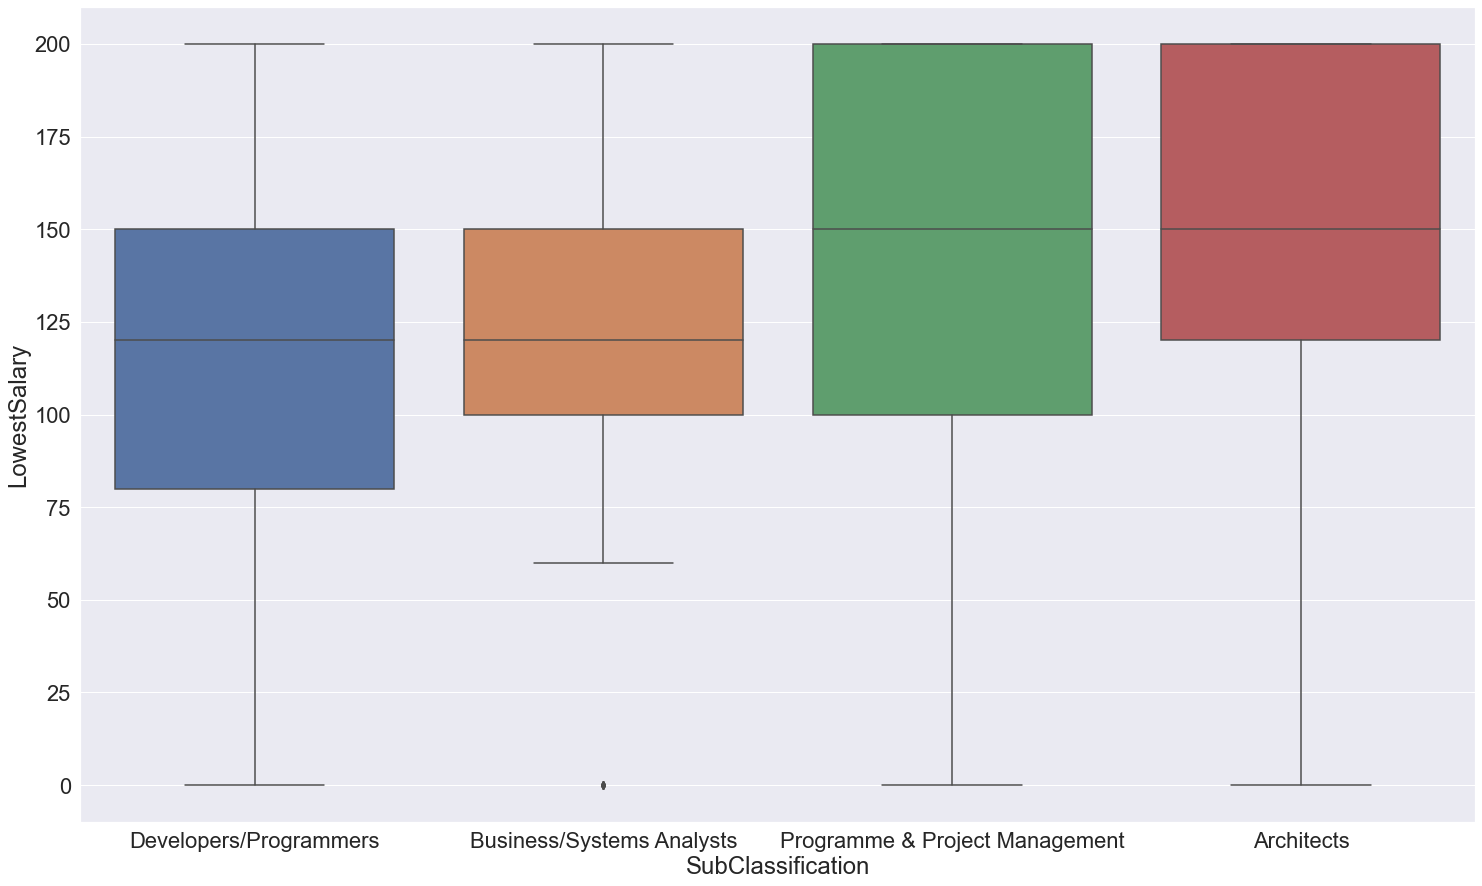

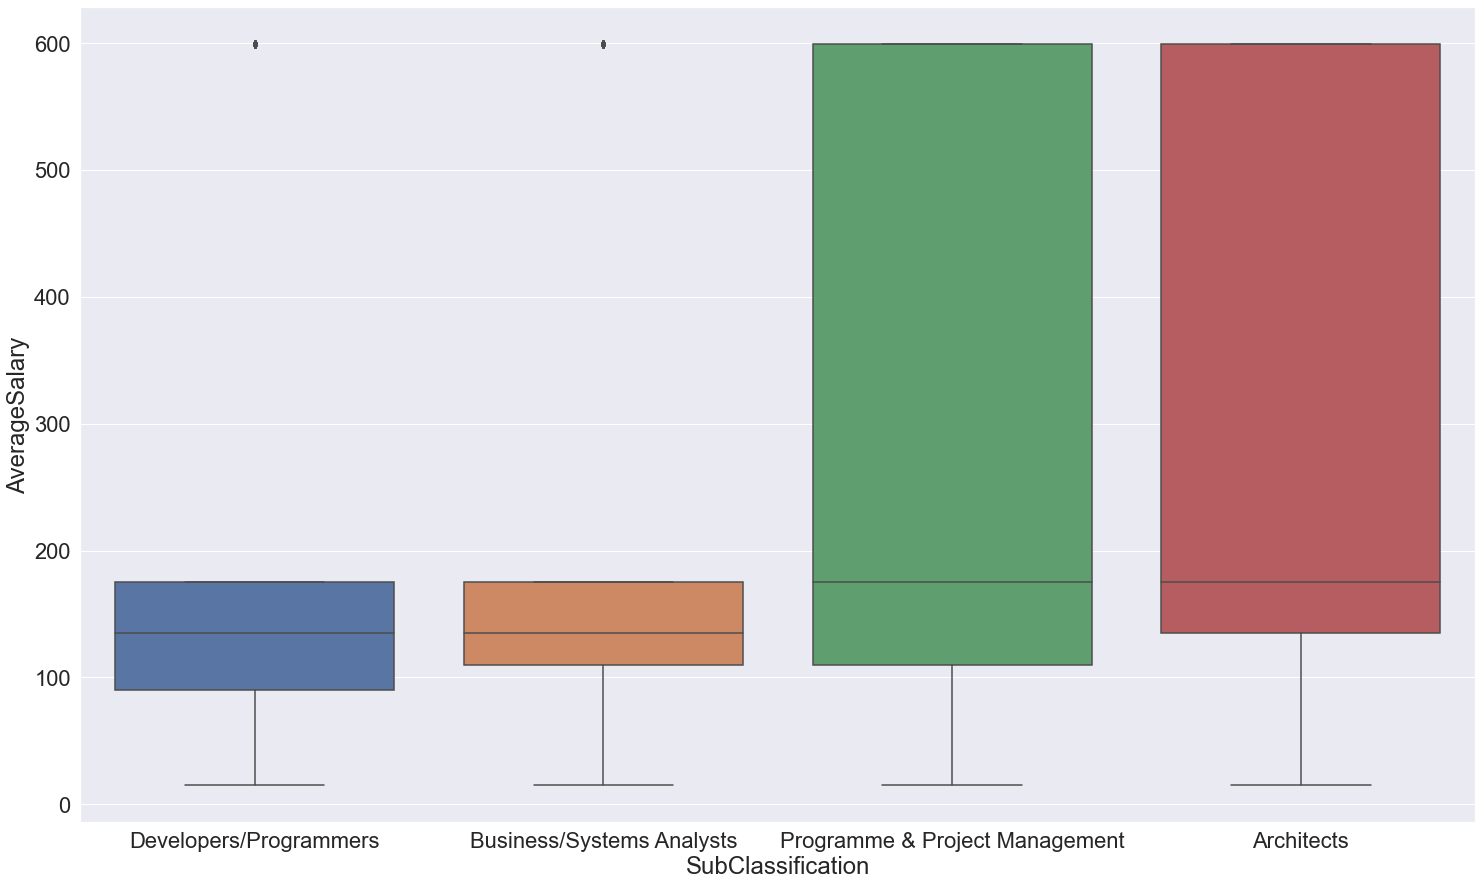

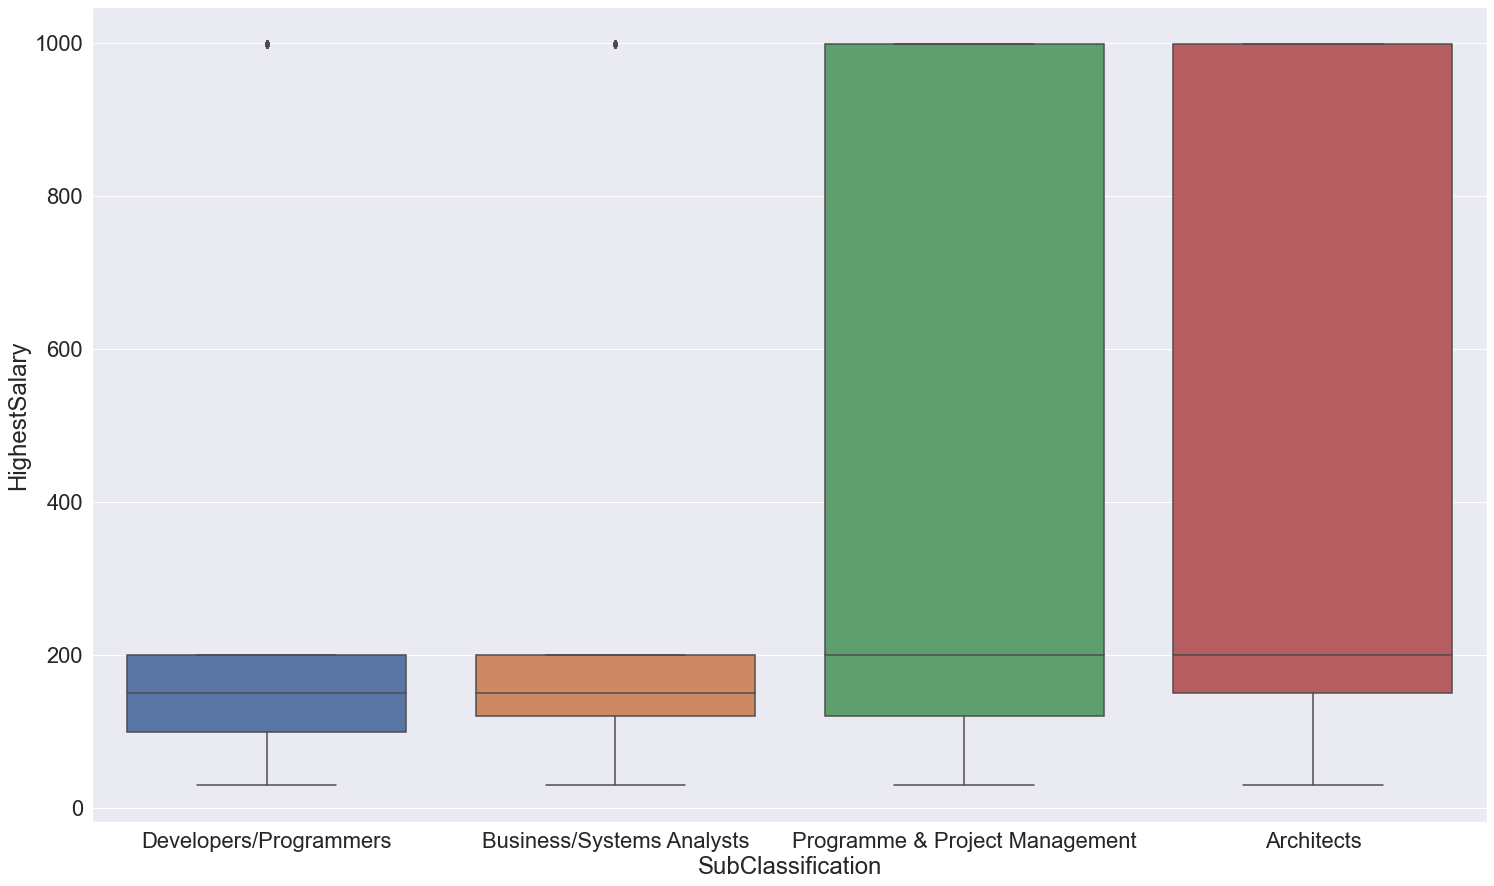

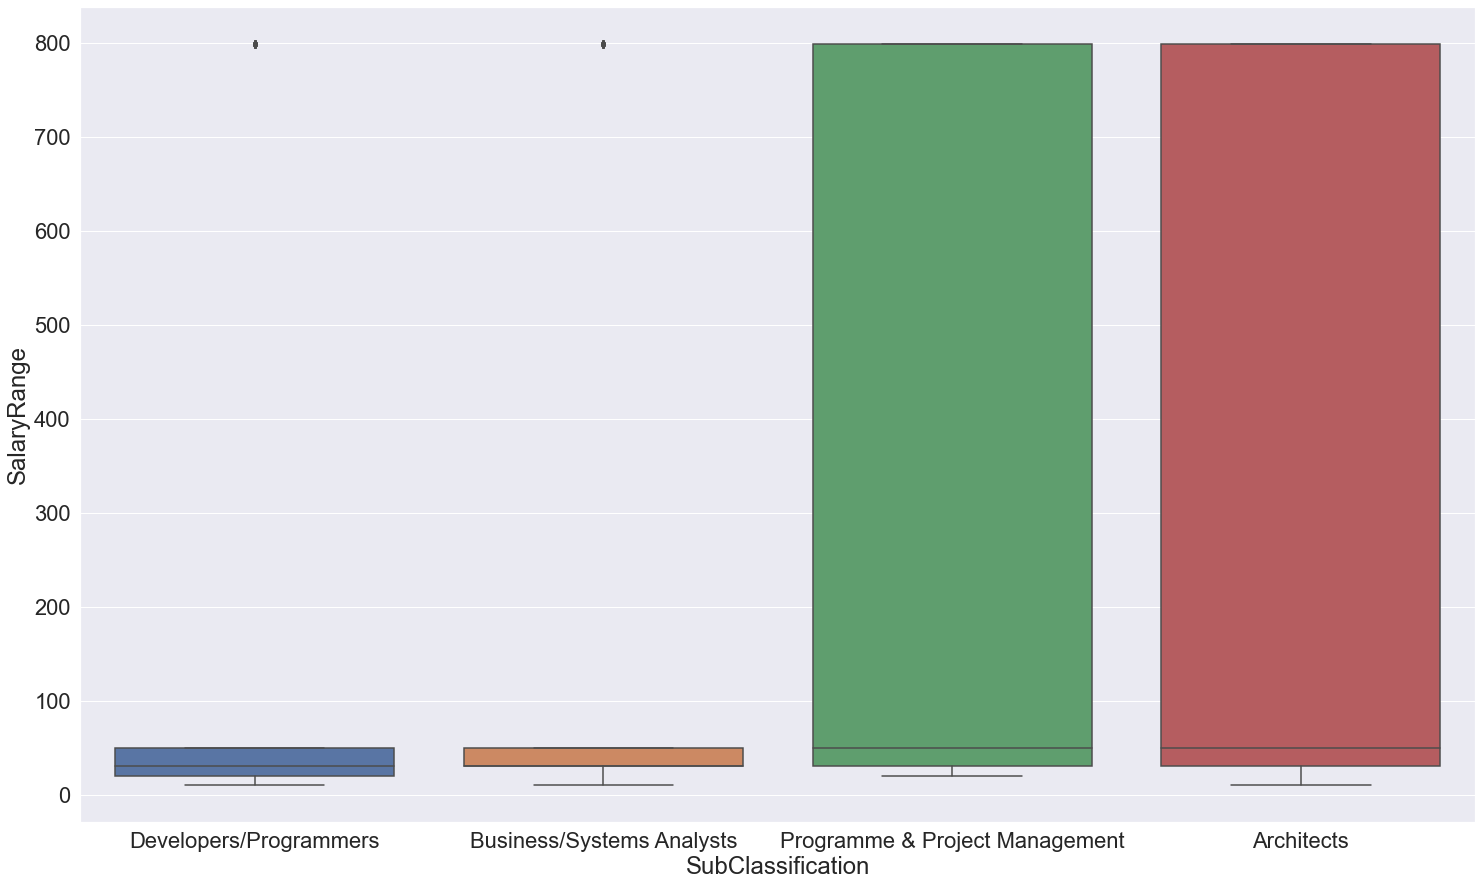

In [27]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x='SubClassification',y='LowestSalary',data=df, order=['Developers/Programmers',
                                                                        'Business/Systems Analysts',
                                                                        'Programme & Project Management','Architects'])
plt.show()
plt.figure(figsize=(25,15))
ax = sns.boxplot(x='SubClassification',y='AverageSalary',data=df, order=['Developers/Programmers',
                                                                        'Business/Systems Analysts',
                                                                        'Programme & Project Management','Architects'])
plt.show()
plt.figure(figsize=(25,15))
ax = sns.boxplot(x='SubClassification',y='HighestSalary',data=df, order=['Developers/Programmers',
                                                                        'Business/Systems Analysts',
                                                                        'Programme & Project Management','Architects'])
plt.show()
plt.figure(figsize=(25,15))
ax = sns.boxplot(x='SubClassification',y='SalaryRange',data=df, order=['Developers/Programmers',
                                                                        'Business/Systems Analysts',
                                                                        'Programme & Project Management','Architects'])
plt.show()

In [28]:
means = []
indexes = ['Developers/Programmers','Business/Systems Analysts','Programme & Project Management','Architects']
for x in indexes:
    means.append(df.loc[df['SubClassification'] == x].describe().mean()[4])

subclassmeans = pd.Series(means,indexes)

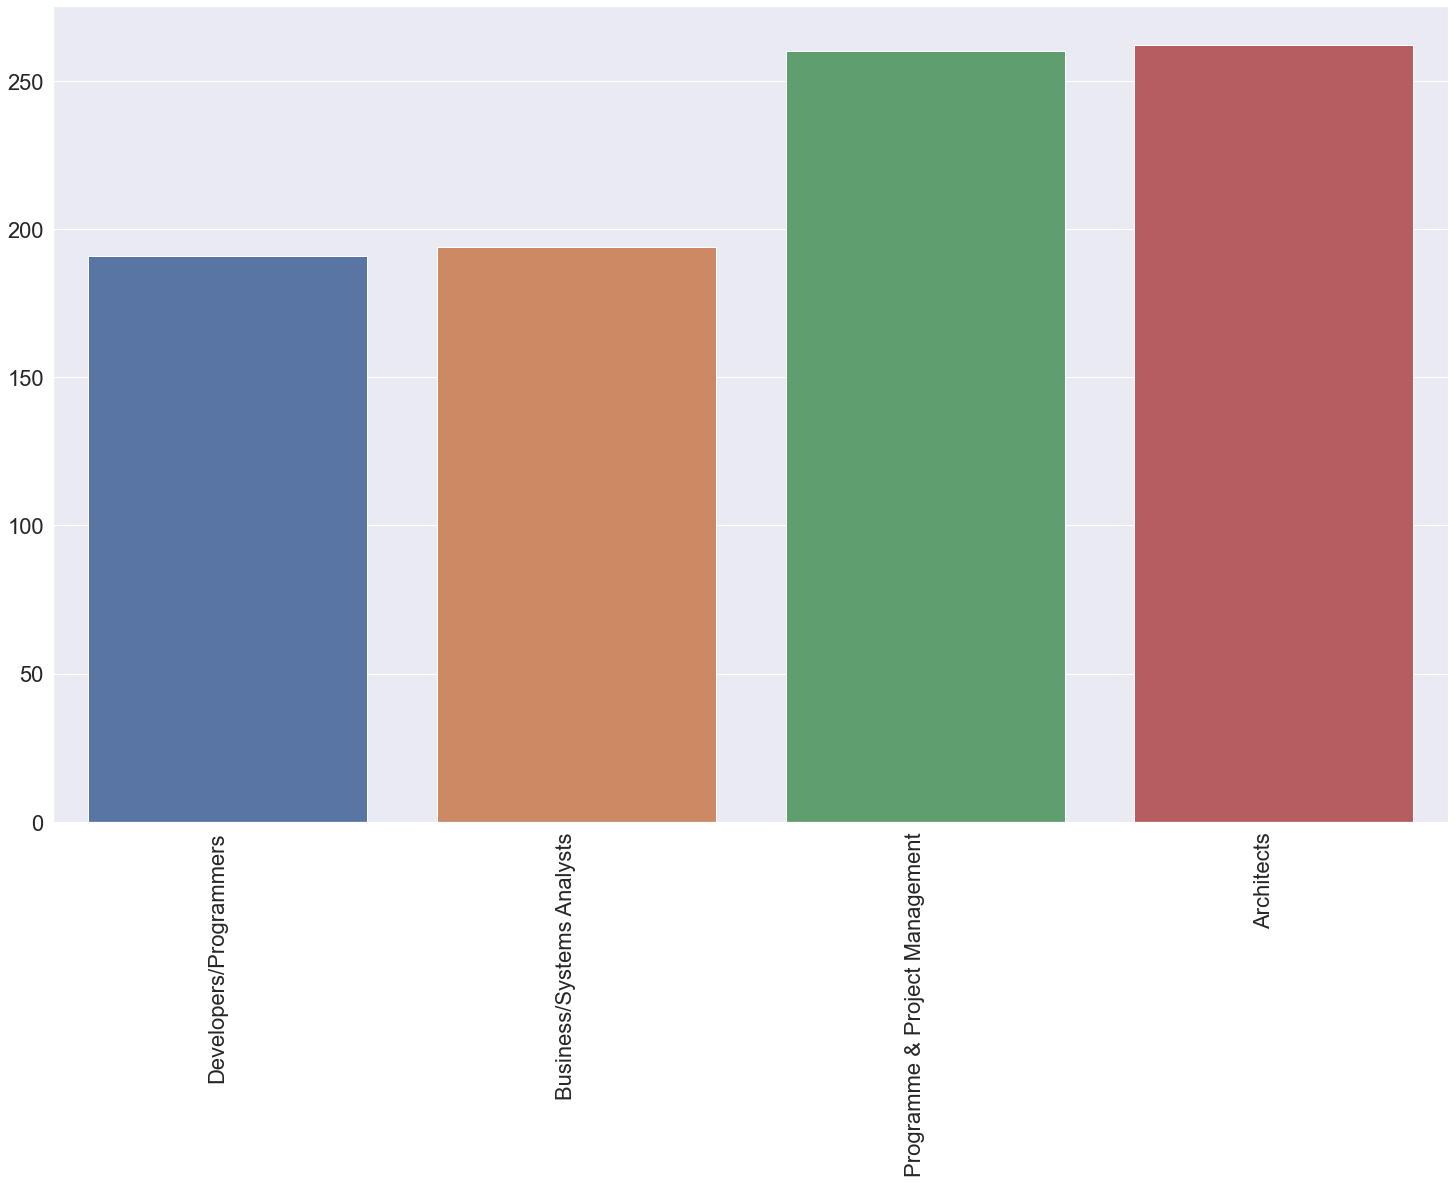

In [29]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=subclassmeans.index,y=subclassmeans.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()